In [6]:
!grep '	start_codon	.*	+	.*transcript_support_level "1"' ./gencode.gtf | \
 sed -e 's/	[^	]*transcript_id "\([^"]*\)".*$/	\1/g' > gencode-start.gtfs
!head gencode-start.gtfs

chr1	HAVANA	start_codon	4878137	4878139	.	+	0	ENSMUST00000134384.8
chr1	HAVANA	start_codon	4878137	4878139	.	+	0	ENSMUST00000027036.11
chr1	HAVANA	start_codon	4878137	4878139	.	+	0	ENSMUST00000150971.8
chr1	HAVANA	start_codon	4928137	4928139	.	+	0	ENSMUST00000081551.14
chr1	HAVANA	start_codon	5154674	5154676	.	+	0	ENSMUST00000044369.13
chr1	HAVANA	start_codon	5659272	5659274	.	+	0	ENSMUST00000160777.8
chr1	HAVANA	start_codon	5659272	5659274	.	+	0	ENSMUST00000027038.11
chr1	HAVANA	start_codon	6300227	6300229	.	+	0	ENSMUST00000027040.13
chr1	HAVANA	start_codon	6429555	6429557	.	+	0	ENSMUST00000133144.4
chr1	HAVANA	start_codon	6839122	6839124	.	+	0	ENSMUST00000140079.8


In [5]:
!bedtools intersect -a gencode-start.gtfs -b gencode-plusexon.gtf -wa -wb | \
 awk -F'	' -v OFS='	' '$9 == $18 { print $10, $13-1, $14, $18, $4-1, $16; }' | \
 sort -k1,1 -k2,3n -k4,4 > gencode-exons-containing-startcodon.bed
!head gencode-exons-containing-startcodon.bed; tail gencode-exons-containing-startcodon.bed

chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878045	4878205	ENSMUST00000027036.11	4878136	+
chr1	4878052	4878205	ENSMUST00000150971.8	4878136	+
chr1	4928036	4928199	ENSMUST00000081551.14	4928136	+
chr1	5154639	5154786	ENSMUST00000044369.13	5154673	+
chr1	5659227	5659528	ENSMUST00000027038.11	5659271	+
chr1	5659257	5659528	ENSMUST00000160777.8	5659271	+
chr1	6300182	6300297	ENSMUST00000027040.13	6300226	+
chr1	6429441	6429738	ENSMUST00000133144.4	6429554	+
chr1	6839121	6839176	ENSMUST00000043578.13	6839121	+
chrY	80939672	80939804	ENSMUST00000185340.2	80939686	+
chrY	81470683	81470815	ENSMUST00000187135.2	81470697	+
chrY	82237903	82238035	ENSMUST00000185636.2	82237917	+
chrY	83043623	83043755	ENSMUST00000187165.2	83043637	+
chrY	84109956	84110088	ENSMUST00000185776.7	84109970	+
chrY	84759361	84759493	ENSMUST00000186110.2	84759375	+
chrY	86074448	86074580	ENSMUST00000188754.2	86074462	+
chrY	87129500	87129632	ENSMUST00000189543.7	87129514	+
chrY	87563647	87563779	ENSMUST0000

In [ ]:
"""
!(samtools view -H ../binfo1-datapack1/RPF-siLuc.bam; \ #header를 가져오는 것 
  samtools view -F20 ../binfo1-datapack1/RPF-siLuc.bam | \ #Bam 파일의 시퀀스(read)를 읽음 / Flag20 - 16 (역방향) + 4 (정렬되지 않음)를 제외한 시퀀스
  bioawk -c sam '{ if (length($seq) >= 25) print $0; }') | \ 
    #길이가 25bp 이상인 시퀀스만 선택 why? 25bp 이상의 Read가 주로 리보솜에 의해 보호된 mRNA 조각을 나타냄
 samtools view -b -o filtered-RPF-siLuc.bam
 """

In [ ]:
"""
#BAM 파일의 5' 끝 위치에 대한 Coverage를 계산하는 과정
!bedtools genomecov -ibam filtered-RPF-siLuc.bam -bg -5 > fivepcounts-RPF-siLuc.bed
!head fivepcounts-RPF-siLuc.bed
"""

In [7]:
!bedtools intersect -a fivepcounts-RPF-siLuc.bed -b gencode-exons-containing-startcodon.bed \
 -wa -wb -nonamecheck > fivepcounts-filtered-RPF-siLuc.txt
!head fivepcounts-filtered-RPF-siLuc.txt

chr1	4878048	4878049	1	chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878048	4878049	1	chr1	4878045	4878205	ENSMUST00000027036.11	4878136	+
chr1	4878077	4878078	1	chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878077	4878078	1	chr1	4878045	4878205	ENSMUST00000027036.11	4878136	+
chr1	4878077	4878078	1	chr1	4878052	4878205	ENSMUST00000150971.8	4878136	+
chr1	4878101	4878102	4	chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878101	4878102	4	chr1	4878045	4878205	ENSMUST00000027036.11	4878136	+
chr1	4878101	4878102	4	chr1	4878052	4878205	ENSMUST00000150971.8	4878136	+
chr1	4878103	4878104	1	chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878103	4878104	1	chr1	4878045	4878205	ENSMUST00000027036.11	4878136	+


KeyboardInterrupt: 

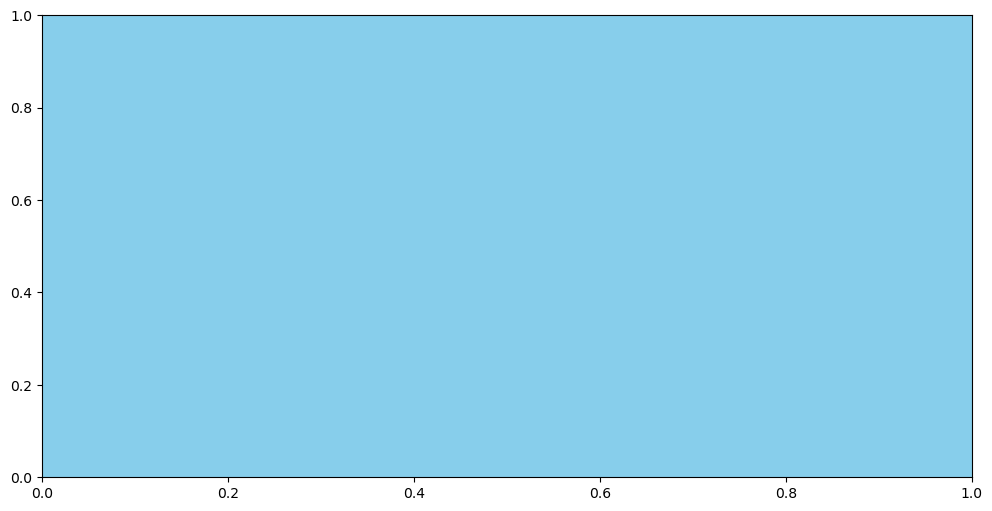

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 읽기
df = pd.read_csv("fivepcounts-filtered-RPF-siLuc.txt", sep="\t", header=None)
df.columns = ["chr", "start", "end", "coverage", "chr_anno", "start_anno", "end_anno", "transcript", "start_codon", "strand"]

# Start codon 위치 기준으로 상대 위치 계산
df["relative_position"] = df["start"] - df["start_anno"]

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(df["relative_position"], df["coverage"], width=1, color="skyblue")
plt.title(f"Ribosome Footprint Density near Start Codon of {gene_of_interest}")
plt.xlabel("Relative Position to Start Codon")
plt.ylabel("Ribosome Footprint Density")
plt.show()


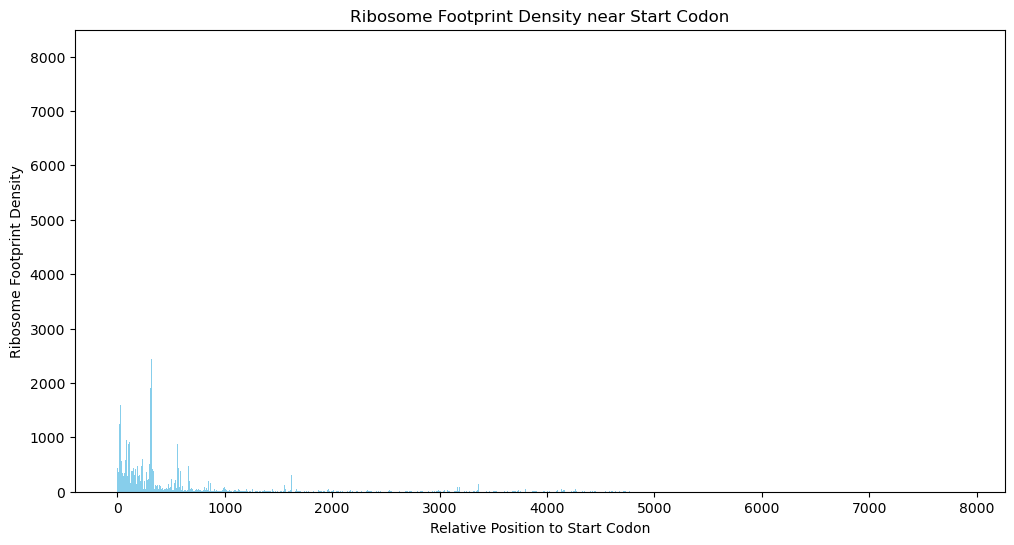

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# 빈 리스트 선언 (모든 데이터를 하나로 합칠 리스트)
relative_positions = []
coverage_values = []

# 데이터 청크 단위로 처리 (예: 한 번에 10000개 행)
chunk_size = 10000

# 파일을 청크 단위로 읽기
for chunk in pd.read_csv("fivepcounts-filtered-RPF-siLuc.txt", sep="\t", header=None, chunksize=chunk_size):
    # 컬럼 이름 지정
    chunk.columns = ["chr", "start", "end", "coverage", "chr_anno", "start_anno", "end_anno", "transcript", "start_codon", "strand"]
    
    # Start codon 위치 기준으로 상대 위치 계산
    chunk["relative_position"] = chunk["start"] - chunk["start_anno"]
    
    # 데이터를 리스트에 추가
    relative_positions.extend(chunk["relative_position"].values)
    coverage_values.extend(chunk["coverage"].values)

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(relative_positions, coverage_values, width=1, color="skyblue")
plt.title("Ribosome Footprint Density near Start Codon")
plt.xlabel("Relative Position to Start Codon")
plt.ylabel("Ribosome Footprint Density")
plt.show()
